In [37]:
!pip install fbprophet

In [279]:
!pip install statsmodels

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [281]:
dataset = pd.read_csv("time_series_covid_19_confirmed.csv")
dataset_death = pd.read_csv("time_series_covid_19_deaths.csv")
dataset_recovered = pd.read_csv('time_series_covid_19_recovered.csv')

In [282]:
df = dataset.iloc[:,4:].T
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/25/21,66903,132229,127361,13664,32933,1258,3586736,222139,124,5576,171,1611,750,234,20563,1017,642138,332894,11597,223613,792196,4000,387818,1050677,12777,8025,1423,355349,203513,52865,16194209,236,417133,13416,143296,4568,29549,26329,77733,225034,...,169900,34889,13495,1064375,690123,24252,5456,13308,509,135439,5816,13384,20879,337529,5203385,33166418,44074,2244084,559291,109,2490,248,578,4065,63,4290,1591,20,4,2409,4467310,271859,98849,4,226136,5931,306334,6670,93428,38706
5/26/21,67743,132244,127646,13671,33338,1258,3622135,222269,124,5576,172,1613,752,234,20575,1017,642583,333097,11597,226416,793693,4004,388987,1052652,12784,8058,1464,358562,203658,52865,16274695,240,417526,13419,143318,4592,29763,26989,77982,225424,...,172277,34889,13720,1067107,691119,24315,6091,13308,509,137894,6245,13396,21461,338853,5212123,33190470,44281,2247605,561048,109,2491,248,581,4065,63,4290,1591,20,4,2409,4470297,276435,99064,4,227407,6086,306795,6688,93627,38819
5/27/21,68366,132264,127926,13682,33607,1258,3663215,222409,124,5579,172,1615,752,234,20581,1017,643168,333317,11622,229468,794985,4006,390203,1055543,12789,8058,1491,361580,203762,53771,16342162,241,417819,13421,143414,4650,29939,27638,77982,225937,...,174861,34889,14012,1068473,692111,24365,6761,13308,509,143280,6459,13420,21987,340250,5220549,33217995,44594,2251242,563215,109,2491,248,581,4065,63,4292,1591,20,4,2411,4473677,280372,99344,4,228828,6356,306795,6696,93947,38854
5/28/21,69130,132285,128198,13693,33944,1259,3702422,222513,124,5580,173,1616,752,234,20587,1017,643709,333559,11684,232425,796343,4009,391637,1057903,12791,8058,1503,364570,203839,53771,16391930,241,418106,13424,143486,4669,30122,28237,77982,226449,...,177711,35289,14305,1068473,693023,24410,7315,13308,509,147039,6622,13432,22620,341952,5228322,33239963,45231,2254674,565451,109,2491,248,581,4065,63,4293,1592,20,4,2411,4477705,282198,99580,4,230147,6396,307569,6723,94430,38918


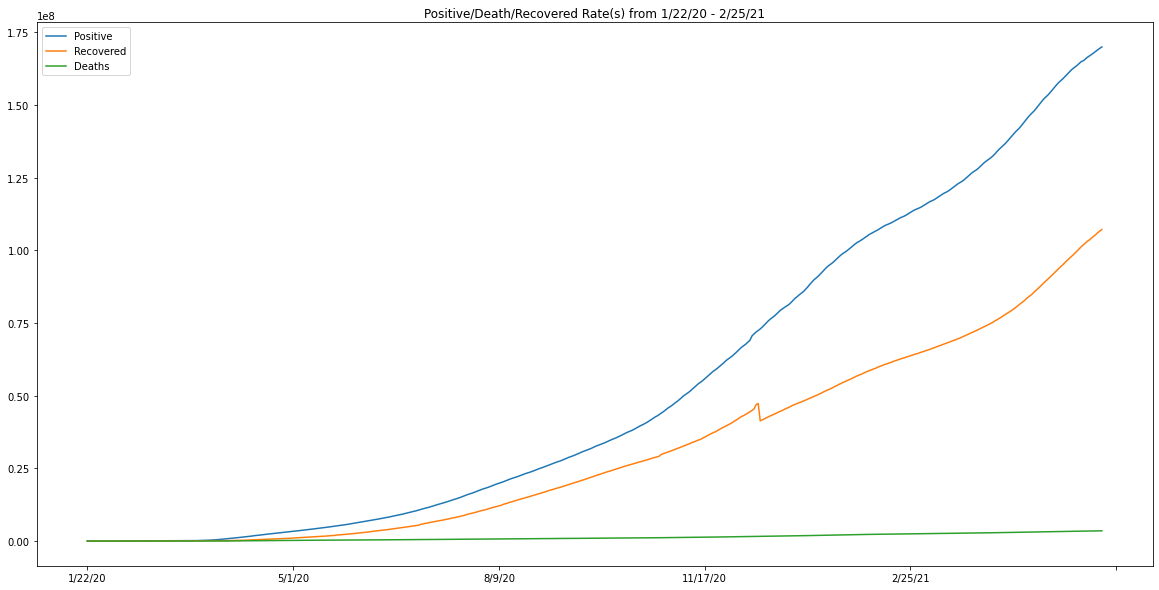

In [283]:

xdf = {'Positive':df.sum(axis = 1),
      'Recovered':dataset_recovered.iloc[:,4:].T.sum(axis = 1),
      'Deaths':dataset_death.iloc[:,4:].T.sum(axis = 1)}
pd.DataFrame(xdf).plot(title ="Positive/Death/Recovered Rate(s) from 1/22/20 - 2/25/21" ,
                      figsize= (20,10))

# FbProphet

In [284]:
data = pd.DataFrame(dataset_death.iloc[:,4:].T.sum(axis = 1))
data

,0
1/22/20,17
1/23/20,18
1/24/20,26
1/25/20,42
1/26/20,56
...,...
5/25/21,3485788
5/26/21,3498544
5/27/21,3511297
5/28/21,3523117


In [285]:
data = data.reset_index()
data.columns = ['ds','y']
data

,ds,y
0,1/22/20,17
1,1/23/20,18
2,1/24/20,26
3,1/25/20,42
4,1/26/20,56
...,...,...
489,5/25/21,3485788
490,5/26/21,3498544
491,5/27/21,3511297
492,5/28/21,3523117


In [286]:
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [287]:
future_dates = model.make_future_dataframe(periods=30)
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
519,2021-06-24
520,2021-06-25
521,2021-06-26
522,2021-06-27


In [288]:
forecasting = model.predict(future_dates)
forecasting[['ds','yhat']]

,ds,yhat
0,2020-01-22,-8.108261e+02
1,2020-01-23,2.578310e+02
2,2020-01-24,1.202833e+03
3,2020-01-25,8.962546e+02
4,2020-01-26,-1.580376e+03
...,...,...
519,2021-06-24,3.782710e+06
520,2021-06-25,3.794497e+06
521,2021-06-26,3.805033e+06
522,2021-06-27,3.813398e+06


In [289]:

prediction = model.predict(pd.DataFrame({'ds':future_dates['ds']}))
prediction


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.012232e+02,-1.745313e+04,1.515380e+04,-9.012232e+02,-9.012232e+02,90.397137,90.397137,90.397137,90.397137,90.397137,90.397137,0.0,0.0,0.0,-8.108261e+02
1,2020-01-23,-8.065721e+02,-1.689219e+04,1.599041e+04,-8.065721e+02,-8.065721e+02,1064.403136,1064.403136,1064.403136,1064.403136,1064.403136,1064.403136,0.0,0.0,0.0,2.578310e+02
2,2020-01-24,-7.119210e+02,-1.404683e+04,1.781526e+04,-7.119210e+02,-7.119210e+02,1914.753630,1914.753630,1914.753630,1914.753630,1914.753630,1914.753630,0.0,0.0,0.0,1.202833e+03
3,2020-01-25,-6.172699e+02,-1.444062e+04,1.767886e+04,-6.172699e+02,-6.172699e+02,1513.524499,1513.524499,1513.524499,1513.524499,1513.524499,1513.524499,0.0,0.0,0.0,8.962546e+02
4,2020-01-26,-5.226187e+02,-1.753925e+04,1.483001e+04,-5.226187e+02,-5.226187e+02,-1057.757494,-1057.757494,-1057.757494,-1057.757494,-1057.757494,-1057.757494,0.0,0.0,0.0,-1.580376e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2021-06-24,3.781646e+06,3.753631e+06,3.809565e+06,3.760007e+06,3.804740e+06,1064.403136,1064.403136,1064.403136,1064.403136,1064.403136,1064.403136,0.0,0.0,0.0,3.782710e+06
520,2021-06-25,3.792582e+06,3.766253e+06,3.826378e+06,3.769280e+06,3.818358e+06,1914.753630,1914.753630,1914.753630,1914.753630,1914.753630,1914.753630,0.0,0.0,0.0,3.794497e+06
521,2021-06-26,3.803519e+06,3.774281e+06,3.835906e+06,3.778299e+06,3.831017e+06,1513.524499,1513.524499,1513.524499,1513.524499,1513.524499,1513.524499,0.0,0.0,0.0,3.805033e+06
522,2021-06-27,3.814456e+06,3.779798e+06,3.847173e+06,3.787723e+06,3.843774e+06,-1057.757494,-1057.757494,-1057.757494,-1057.757494,-1057.757494,-1057.757494,0.0,0.0,0.0,3.813398e+06


In [290]:
data = data.set_index('ds')
prediction = prediction[['ds','yhat']]
prediction = prediction.set_index('ds')
prediction

,yhat
ds,
2020-01-22,-8.108261e+02
2020-01-23,2.578310e+02
2020-01-24,1.202833e+03
2020-01-25,8.962546e+02
2020-01-26,-1.580376e+03
...,...
2021-06-24,3.782710e+06
2021-06-25,3.794497e+06
2021-06-26,3.805033e+06


In [291]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
true = data['y'].iloc[-30:]
pred = prediction[pd.to_datetime(true.index[0]): 
pd.date_range(pd.to_datetime(true.index[0]),periods = 30)[-1]]
print("MAE : {}".format(mean_absolute_error(true.values,pred.values)))
print("RMSE : {}".format(mean_squared_error(true.values,pred.values,squared = False)))

MAE : 21223.065247864928
RMSE : 24127.51937752819


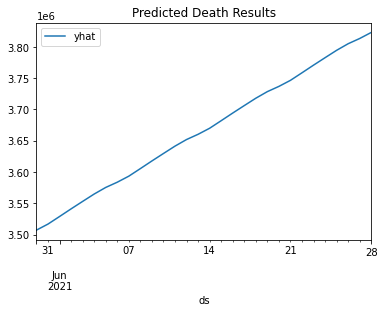

In [292]:
prediction = model.predict(pd.DataFrame({'ds':future_dates['ds'][-30:]}))[['ds','yhat']]
prediction['ds']=pd.date_range('5/30/21',periods = 30)

prediction.plot(x = 'ds',y= 'yhat',title = 'Predicted Death Results')

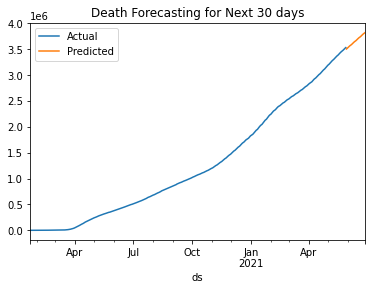

In [293]:
xdata = data.copy()
xdata = xdata.reset_index()
xdata.columns = ['ds','Actual']
prediction.columns = ['ds','Predicted']
xdata['ds'] = pd.to_datetime(xdata['ds'])
ax = xdata.plot(x= 'ds',y= 'Actual',title = 'Death Forecasting for Next 30 days')
prediction.plot(x = 'ds',y= 'Predicted',ax = ax)

# ARIMA

In [294]:

from statsmodels.tsa.arima_model import ARIMA
data = data.reset_index()


In [295]:
xdata = data.copy()
xdata.columns = ['dates','Count']
xdata['Count'] = xdata['Count'].astype({'Count':'float32'})

xdata['dates'] = pd.to_datetime(xdata['dates'])
xdata = xdata.set_index('dates')
#xdata['Count'] = xdata['Count'].astpye('float32')
model = ARIMA(xdata['Count'], order = (1,1,0), freq = 'D')
fit_model = model.fit()

In [296]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Count   No. Observations:                  493
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4377.153
Method:                       css-mle   S.D. of innovations           1733.357
Date:                Sat, 05 Jun 2021   AIC                           8760.306
Time:                        10:20:44   BIC                           8772.908
Sample:                    01-23-2020   HQIC                          8765.254
                         - 05-29-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7081.7524    909.942      7.783      0.000    5298.299    8865.206
ar.L1.D.Count     0.9160      0.018     50.757      0.000       0.881       0.951
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0917           +0.0000j            1.0917            0.0000
-----------------------------------------------------------------------------
"""

In [297]:
results = fit_model.predict(start='2021-05-30',end = '2021-07-01',dynamic = True)
results

2021-05-30    10214.781428
2021-05-31     9951.682311
2021-06-01     9710.677195
2021-06-02     9489.910714
2021-06-03     9287.683310
2021-06-04     9102.438146
2021-06-05     8932.749123
2021-06-06     8777.309898
2021-06-07     8634.923830
2021-06-08     8504.494770
2021-06-09     8385.018614
2021-06-10     8275.575584
2021-06-11     8175.323137
2021-06-12     8083.489485
2021-06-13     7999.367652
2021-06-14     7922.310030
2021-06-15     7851.723397
2021-06-16     7787.064343
2021-06-17     7727.835096
2021-06-18     7673.579681
2021-06-19     7623.880417
2021-06-20     7578.354696
2021-06-21     7536.652041
2021-06-22     7498.451407
2021-06-23     7463.458707
2021-06-24     7431.404553
2021-06-25     7402.042178
2021-06-26     7375.145536
2021-06-27     7350.507565
2021-06-28     7327.938591
2021-06-29     7307.264869
2021-06-30     7288.327242
2021-07-01     7270.979921
Freq: D, dtype: float64

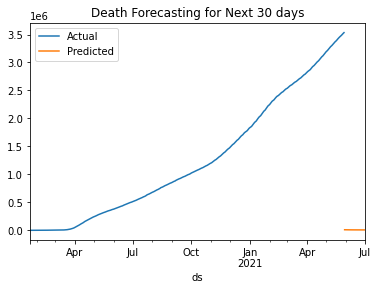

In [299]:
xdata = data.copy()
#xdata = xdata.reset_index()
xdata.columns = ['ds','Actual']
results = pd.DataFrame(results)
results = results.reset_index()
results.columns = ['ds','Predicted']
xdata['ds'] = pd.to_datetime(xdata['ds'])
ax = xdata.plot(x= 'ds',y= 'Actual',title = 'Death Forecasting for Next 30 days')
results.plot(x = 'ds',y= 'Predicted',ax = ax)

In [300]:
results = fit_model.predict(start='2021-05-01',end = '2021-07-01',dynamic = True)
results = pd.DataFrame(results)
results = results.reset_index()
results.columns = ['ds','Predicted']
pred = results['Predicted'].values
true = xdata['Actual'].iloc[-results.shape[0]:].values
print("MAE : {}".format(mean_absolute_error(true,pred)))
print("RMSE : {}".format(mean_squared_error(true,pred,squared = False)))

MAE : 3150610.592222489
RMSE : 3158579.4267255715


In [309]:
#xdata = xdata.set_index('ds')
data = data.set_index('ds')

In [358]:
results = fit_model.predict(start='2021-05-01',end = '2021-05-29',dynamic = True)

true = data['y'].iloc[-results.shape[0]:]
print(f'start date : {true.index[0]}')
print(f'end date : {true.index[-1]}')
results = pd.DataFrame(results)
results = results.reset_index()
results.columns = ['ds','Predicted']
results = results.set_index('ds')
pred = results['2020-11-29':'2021-05-29']

print("MAE : {}".format(mean_absolute_error(true,pred)))
print("RMSE : {}".format(mean_squared_error(true,pred,squared = False)))


start date : 5/1/21
end date : 5/29/21
MAE : 3356557.050731694
RMSE : 3358175.5630732076


In [342]:
true.index[0].replace('/','-')

'11-29-20'

In [272]:
true = xdata['Actual'].iloc[-results.shape[0]:]
true = pd.DataFrame(true)
=

AttributeError: ignored

In [308]:
data

,ds,y
0,1/22/20,17
1,1/23/20,18
2,1/24/20,26
3,1/25/20,42
4,1/26/20,56
...,...,...
489,5/25/21,3485788
490,5/26/21,3498544
491,5/27/21,3511297
492,5/28/21,3523117
